In [2]:
# Import the pandas library, which is the tool for working with data tables in Python
import pandas as pd

# Load the dataset you uploaded into a variable called 'df' (short for DataFrame)
# Make sure the filename matches exactly what you uploaded.
file_path = 'student_learning_interaction_dataset.csv'
df = pd.read_csv("student_learning_interaction_dataset.csv")

# --- Let's Explore! ---

# 1. Print the first 5 rows to get a quick look at the data
print("---------- First 5 Rows ----------")
print(df.head())
print("\n") # Adds a blank line for readability

# 2. Get a summary of the dataset's structure
# This tells you column names, how many non-null values there are, and the data type of each column.
print("---------- Dataset Info ----------")
df.info()
print("\n")

# 3. Get basic statistics for all numerical columns
# This shows you the count, mean, standard deviation, min, max, etc.
print("---------- Statistical Summary ----------")
print(df.describe())

---------- First 5 Rows ----------
  student_id session_id            timestamp module_id  time_spent_minutes  \
0      S0001   S0001_S1  2024-03-04 20:52:00    SCI101           34.967142   
1      S0001   S0001_S2  2024-03-24 12:57:00   MATH101           32.330952   
2      S0001   S0001_S3  2024-03-23 16:58:00     CS101           31.424646   
3      S0001   S0001_S4  2024-02-03 09:37:00    SCI101           23.982934   
4      S0001   S0001_S5  2024-04-22 23:38:00    SCI101           32.186383   

   pages_visited  video_watched_percent  click_events  notes_taken  \
0             12              66.543392            17            0   
1              3              72.949865            30            0   
2             10              69.133695            12            0   
3              8             100.000000            17            0   
4              9              92.044026            23            0   

   forum_posts  ...  attempts_taken  assignment_score  feedback_rating  \
0

In [3]:
# It's common for 'forum_posts' to have missing values (NaN).
# Let's replace these missing values with an empty string ''.
df['forum_posts'].fillna('', inplace=True)

# Let's also handle potential missing values in 'feedback_rating'
# We can replace them with 0 or the average (mean). Let's use 0 for simplicity.
df['feedback_rating'].fillna(0, inplace=True)


# --- Verify the cleaning ---
# Run .info() again to see if the Non-Null counts have changed.
print("---------- Dataset Info After Cleaning ----------")
df.info()

---------- Dataset Info After Cleaning ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   student_id                9000 non-null   object 
 1   session_id                9000 non-null   object 
 2   timestamp                 9000 non-null   object 
 3   module_id                 9000 non-null   object 
 4   time_spent_minutes        9000 non-null   float64
 5   pages_visited             9000 non-null   int64  
 6   video_watched_percent     9000 non-null   float64
 7   click_events              9000 non-null   int64  
 8   notes_taken               9000 non-null   int64  
 9   forum_posts               9000 non-null   int64  
 10  revisit_flag              9000 non-null   int64  
 11  quiz_score                9000 non-null   int64  
 12  attempts_taken            9000 non-null   int64  
 13  assignment_sc

C:\Users\ASUS TUF DASH F15\AppData\Local\Temp\ipykernel_24384\3290883711.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['forum_posts'].fillna('', inplace=True)
C:\Users\ASUS TUF DASH F15\AppData\Local\Temp\ipykernel_24384\3290883711.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [4]:
# Group the DataFrame by student_id
student_groups = df.groupby('student_id')

# For example, let's look at the data for one student
one_student_data = student_groups.get_group('S0001')
print("--- All sessions for student S0001 ---")
print(one_student_data)

--- All sessions for student S0001 ---
   student_id session_id            timestamp module_id  time_spent_minutes  \
0       S0001   S0001_S1  2024-03-04 20:52:00    SCI101           34.967142   
1       S0001   S0001_S2  2024-03-24 12:57:00   MATH101           32.330952   
2       S0001   S0001_S3  2024-03-23 16:58:00     CS101           31.424646   
3       S0001   S0001_S4  2024-02-03 09:37:00    SCI101           23.982934   
4       S0001   S0001_S5  2024-04-22 23:38:00    SCI101           32.186383   
5       S0001   S0001_S6  2024-03-26 01:01:00    ENG101           29.564632   
6       S0001   S0001_S7  2024-01-02 17:56:00    PHY101           32.115870   
7       S0001   S0001_S8  2024-03-10 23:27:00    ENG101           34.578851   
8       S0001   S0001_S9  2024-01-30 18:10:00    SCI101           56.335282   
9       S0001  S0001_S10  2024-04-10 23:07:00    ENG101           28.947429   
10      S0001  S0001_S11  2024-04-08 14:01:00    ENG101           32.961203   
11      S0001

In [5]:
import numpy as np

# Define which columns will be our features (inputs) and our target (output)
# We want to predict the 'success_label' based on the other features.
features = [col for col in df.columns if col not in ['student_id', 'session_id', 'timestamp', 'success_label']]
target = 'success_label'

# Let's define the length of our sequences
SEQUENCE_SIZE = 5

X_sequences, y_sequences = [], []

# Loop through each student's data
for student_id, student_df in student_groups:
    # Get the feature and target data for this student
    feature_data = student_df[features].values
    target_data = student_df[target].values

    # Create sequences for this student
    for i in range(len(student_df) - SEQUENCE_SIZE):
        X_sequences.append(feature_data[i:i + SEQUENCE_SIZE])
        y_sequences.append(target_data[i + SEQUENCE_SIZE])

# Convert lists to numpy arrays, which is the required format for our AI model
X = np.array(X_sequences)
y = np.array(y_sequences)

print(f"\nShape of our input sequences (X): {X.shape}")
print(f"Shape of our output labels (y): {y.shape}")


Shape of our input sequences (X): (7500, 5, 18)
Shape of our output labels (y): (7500,)


In [6]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of training data (X_train): {X_train.shape}")
print(f"Shape of testing data (X_test): {X_test.shape}")


Shape of training data (X_train): (6000, 5, 18)
Shape of testing data (X_test): (1500, 5, 18)


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- 1. Data Loading and Initial Setup ---
# Load the dataset from the provided CSV file.
# This file should contain the learning session data for all students.
try:
    df = pd.read_csv('student_learning_interaction_dataset.csv')
    print("✅ Dataset loaded successfully.")
    print(f"Original shape of the dataset: {df.shape}")
except FileNotFoundError:
    print("❌ Error: 'student_learning_data.csv' not found.")
    print("Please make sure the CSV file is in the same directory as the script.")
    # As a fallback, create a dummy dataframe for demonstration purposes
    data = {
        'student_id': [f'S{i//30:04d}' for i in range(9000)],
        'session_id': [f'S{i//30:04d}_S{i%30+1}' for i in range(9000)],
        'timestamp': pd.to_datetime(np.random.randint(1672531200, 1704067199, size=9000), unit='s'),
        'module_id': np.random.choice(['SCI101', 'MATH101', 'CS101', 'ENG101', 'PHY101'], 9000),
        'time_spent_minutes': np.random.uniform(15, 60, 9000),
        'pages_visited': np.random.randint(1, 20, 9000),
        'video_watched_percent': np.random.uniform(0, 100, 9000),
        'click_events': np.random.randint(10, 50, 9000),
        'notes_taken': np.random.randint(0, 2, 9000),
        'forum_posts': np.random.randint(0, 5, 9000),
        'revisit_flag': np.random.randint(0, 2, 9000),
        'quiz_score': np.random.randint(50, 101, 9000),
        'attempts_taken': np.random.randint(1, 4, 9000),
        'assignment_score': np.random.randint(60, 101, 9000),
        'feedback_rating': np.random.randint(1, 6, 9000),
        'days_since_last_activity': np.random.randint(0, 10, 9000),
        'cumulative_quiz_score': np.random.randint(100, 2500, 9000),
        'learning_trend': np.random.uniform(60, 85, 9000),
        'attention_score': np.random.uniform(0.1, 0.4, 9000),
        'feedback_type': np.random.choice(['content_boost', 'practice_more', 'good_progress', 'revise_prev_topic', 'pace_slow'], 9000),
        'next_module_prediction': np.random.choice(['SCI101', 'MATH101', 'CS101', 'ENG101', 'PHY101'], 9000),
        'success_label': np.random.randint(0, 2, 9000)
    }
    df = pd.DataFrame(data)
    print("\n⚠️ A dummy dataset has been created for demonstration.")

# Convert timestamp to datetime objects for proper sorting
df['timestamp'] = pd.to_datetime(df['timestamp'])

# --- 2. Feature Engineering and Preprocessing ---
# Define categorical and numerical features that will be used for prediction.
# We exclude identifiers and the target variable.
categorical_features = ['module_id', 'feedback_type', 'next_module_prediction']
numerical_features = [
    'time_spent_minutes', 'pages_visited', 'video_watched_percent',
    'click_events', 'notes_taken', 'forum_posts', 'revisit_flag',
    'quiz_score', 'attempts_taken', 'assignment_score', 'feedback_rating',
    'days_since_last_activity', 'cumulative_quiz_score', 'learning_trend',
    'attention_score'
]
features_to_process = numerical_features + categorical_features

# Create a preprocessing pipeline to handle both feature types.
# - Numerical features are scaled to have a mean of 0 and a variance of 1.
# - Categorical features are converted into a one-hot encoded format.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
    # We remove `remainder='passthrough'` and will only transform the specified columns
)

# Fit the preprocessor on the feature columns of the dataset to learn the scaling and encoding rules
# and then transform the data.
processed_data = preprocessor.fit_transform(df[features_to_process])

# Get the names of the new one-hot encoded columns
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Combine all feature names in the correct order
all_feature_names = numerical_features + list(encoded_cat_features)

# Create a new DataFrame with the processed data and correct column names
# The shape of `processed_data` and `all_feature_names` will now match.
processed_df = pd.DataFrame(processed_data, columns=all_feature_names, index=df.index)

# Add back the columns that were not part of the transformation
processed_df['student_id'] = df['student_id']
processed_df['timestamp'] = df['timestamp']
processed_df['success_label'] = df['success_label']

# Sort the data by student and timestamp to ensure chronological order for sequences
processed_df = processed_df.sort_values(by=['student_id', 'timestamp'])
print("\n✅ Data preprocessing and feature scaling complete.")

# --- 3. Sequence Creation ---
# Group the processed data by student to create sequences of learning sessions.
student_groups = processed_df.groupby('student_id')
SEQUENCE_SIZE = 5

X_sequences, y_sequences = [], []
features_to_use = [col for col in processed_df.columns if col not in ['student_id', 'timestamp', 'success_label']]

# Iterate through each student's data to create overlapping sequences
for _, student_df in student_groups:
    feature_data = student_df[features_to_use].values
    target_data = student_df['success_label'].values

    if len(student_df) > SEQUENCE_SIZE:
        for i in range(len(student_df) - SEQUENCE_SIZE):
            X_sequences.append(feature_data[i:i + SEQUENCE_SIZE])
            y_sequences.append(target_data[i + SEQUENCE_SIZE])

# Convert the lists of sequences to NumPy arrays for the model
X = np.array(X_sequences)
y = np.array(y_sequences)

print(f"\nShape of input sequences (X): {X.shape}")
print(f"Shape of output labels (y): {y.shape}")

# --- 4. Data Splitting ---
# Split the data into training and testing sets. 80% for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Shape of training data (X_train): {X_train.shape}")
print(f"Shape of testing data (X_test): {X_test.shape}")

# --- 5. Model Building: Bidirectional LSTM ---
# Define the architecture of the neural network.
model = Sequential([
    # Bidirectional LSTM layer processes sequences in both forward and backward directions.
    # `input_shape` is (sequence_length, number_of_features).
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3), # Dropout layer to prevent overfitting
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(16, activation='relu'), # A standard fully connected layer
    # The output layer has one neuron with a sigmoid activation function
    # to produce a probability between 0 and 1 for binary classification.
    Dense(1, activation='sigmoid')
])

# Compile the model, specifying the optimizer, loss function, and metrics.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

# --- 6. Model Training ---
# Train the model on the training data.
print("\n🚀 Starting model training...")
history = model.fit(
    X_train, y_train,
    epochs=20,          # Number of times to iterate over the entire training dataset
    batch_size=32,      # Number of samples per gradient update
    validation_split=0.2 # Fraction of the training data to be used as validation data
)
print("✅ Model training finished.")

# --- 7. Model Evaluation ---
# Evaluate the trained model on the unseen test data.
print("\n🔬 Evaluating model performance on the test set...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions (0 or 1)

# Calculate and print other relevant metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


✅ Dataset loaded successfully.
Original shape of the dataset: (9000, 22)

✅ Data preprocessing and feature scaling complete.

Shape of input sequences (X): (7500, 5, 30)
Shape of output labels (y): (7500,)
Shape of training data (X_train): (6000, 5, 30)
Shape of testing data (X_test): (1500, 5, 30)


D:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 5, 128)         │        48,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,913 (355.13 KB)

 Trainable params: 90,913 (355.13 KB)

 Non-trainable params: 0 (0.00 B)


🚀 Starting model training...
Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7989 - loss: 0.5380 - val_accuracy: 0.7967 - val_loss: 0.5096
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8125 - loss: 0.4820 - val_accuracy: 0.7967 - val_loss: 0.5072
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8027 - loss: 0.4918 - val_accuracy: 0.7967 - val_loss: 0.5068
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8061 - loss: 0.4815 - val_accuracy: 0.7967 - val_loss: 0.5084
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8197 - loss: 0.4544 - val_accuracy: 0.7967 - val_loss: 0.5131
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8064 - loss: 0.4620 - val_accuracy: 0.7967 - val_loss: 0.5197
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8073 - loss: 0.4505 - val_accuracy: 0.7933 - val_loss: 0.5376
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8063 - 

In [14]:
pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


✅ Dataset loaded successfully.
Original shape of the dataset: (9000, 22)

✅ Data preprocessing and feature scaling complete.

Shape of input sequences (X): (7500, 5, 30)
Shape of output labels (y): (7500,)
Shape of training data (X_train): (6000, 5, 30)
Shape of testing data (X_test): (1500, 5, 30)


D:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 5, 64)          │         5,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,777 (61.63 KB)

 Trainable params: 15,777 (61.63 KB)

 Non-trainable params: 0 (0.00 B)


🚀 Starting model training...
Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7619 - loss: 0.5520 - val_accuracy: 0.7967 - val_loss: 0.5062
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.4872 - val_accuracy: 0.7967 - val_loss: 0.5062
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: 0.5074 - val_accuracy: 0.7967 - val_loss: 0.5108
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7962 - loss: 0.5023 - val_accuracy: 0.7967 - val_loss: 0.5059
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8120 - loss: 0.4727 - val_accuracy: 0.7967 - val_loss: 0.5069
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.4872 - val_accuracy: 0.7967 - val_loss: 0.5135
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8180 - loss: 0.4514 - val_accuracy: 0.7967 - val_loss: 0.5126
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8110 - l

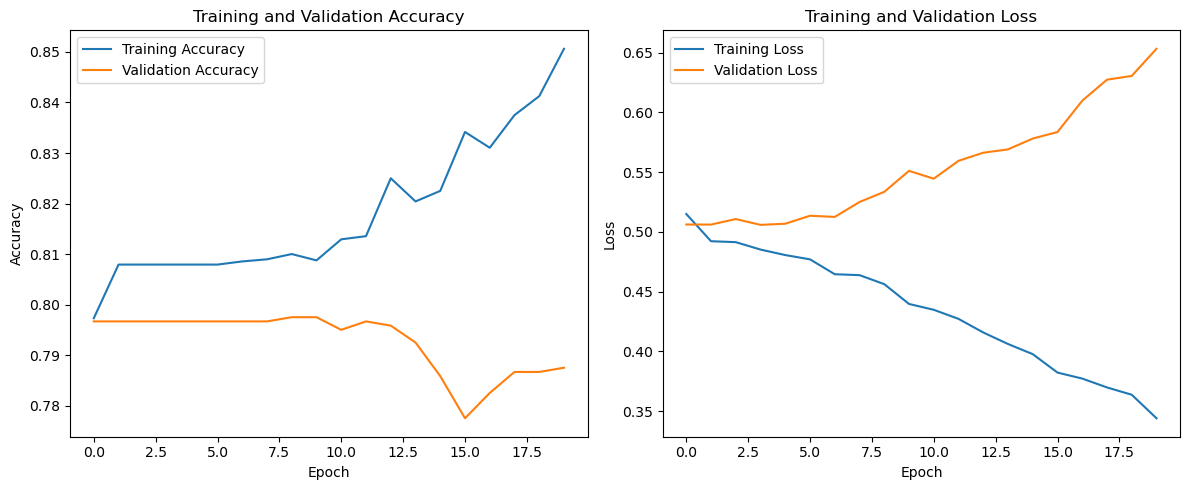

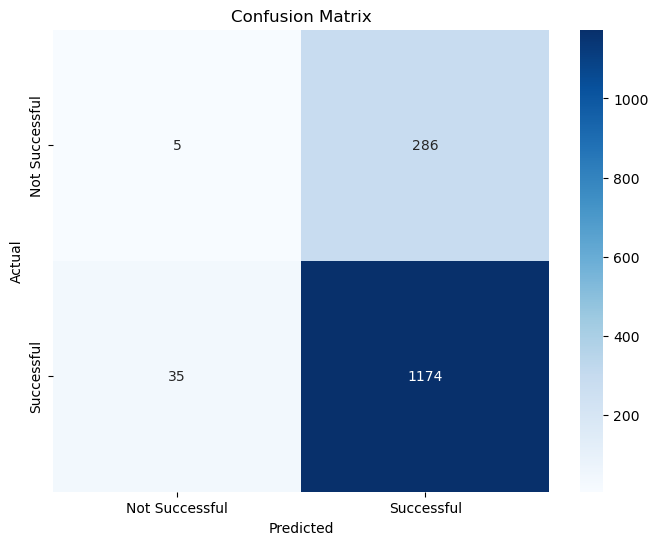


💾 Saving model and preprocessor...
✅ Model and preprocessor saved successfully.
   - Model saved to 'student_success_model.keras'
   - Preprocessor saved to 'preprocessor.joblib'

🧠 Interpreting model predictions with SHAP...


D:\Anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 5, 30))']
  warnings.warn(msg)



⚠️ Note: SHAP for hybrid models is complex. The following plot shows feature
   importance based on the original input features.


C:\Users\ASUS TUF DASH F15\AppData\Local\Temp\ipykernel_12816\3071600431.py:246: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_aggregated_time, feature_names=features_to_use, plot_type="bar")


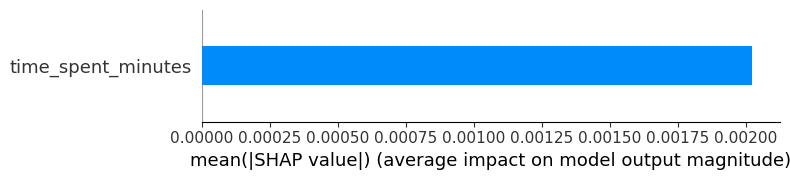


✅ SHAP analysis complete. The plot shows the mean absolute SHAP value for each feature,
   indicating its overall importance to the model's predictions.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras import backend as K

# --- 1. Data Loading and Initial Setup ---
# Load the dataset from the provided CSV file.
try:
    df = pd.read_csv('student_learning_interaction_dataset.csv')
    print("✅ Dataset loaded successfully.")
    print(f"Original shape of the dataset: {df.shape}")
except FileNotFoundError:
    print("❌ Error: 'student_learning_data.csv' not found.")
    print("Please make sure the CSV file is in the same directory as the script.")
    # As a fallback, create a dummy dataframe for demonstration purposes
    data = {
        'student_id': [f'S{i//30:04d}' for i in range(9000)],
        'session_id': [f'S{i//30:04d}_S{i%30+1}' for i in range(9000)],
        'timestamp': pd.to_datetime(np.random.randint(1672531200, 1704067199, size=9000), unit='s'),
        'module_id': np.random.choice(['SCI101', 'MATH101', 'CS101', 'ENG101', 'PHY101'], 9000),
        'time_spent_minutes': np.random.uniform(15, 60, 9000),
        'pages_visited': np.random.randint(1, 20, 9000),
        'video_watched_percent': np.random.uniform(0, 100, 9000),
        'click_events': np.random.randint(10, 50, 9000),
        'notes_taken': np.random.randint(0, 2, 9000),
        'forum_posts': np.random.randint(0, 5, 9000),
        'revisit_flag': np.random.randint(0, 2, 9000),
        'quiz_score': np.random.randint(50, 101, 9000),
        'attempts_taken': np.random.randint(1, 4, 9000),
        'assignment_score': np.random.randint(60, 101, 9000),
        'feedback_rating': np.random.randint(1, 6, 9000),
        'days_since_last_activity': np.random.randint(0, 10, 9000),
        'cumulative_quiz_score': np.random.randint(100, 2500, 9000),
        'learning_trend': np.random.uniform(60, 85, 9000),
        'attention_score': np.random.uniform(0.1, 0.4, 9000),
        'feedback_type': np.random.choice(['content_boost', 'practice_more', 'good_progress', 'revise_prev_topic', 'pace_slow'], 9000),
        'next_module_prediction': np.random.choice(['SCI101', 'MATH101', 'CS101', 'ENG101', 'PHY101'], 9000),
        'success_label': np.random.randint(0, 2, 9000)
    }
    df = pd.DataFrame(data)
    print("\n⚠️ A dummy dataset has been created for demonstration.")

# Convert timestamp to datetime objects for proper sorting
df['timestamp'] = pd.to_datetime(df['timestamp'])

# --- 2. Feature Engineering and Preprocessing ---
# Define feature sets
categorical_features = ['module_id', 'feedback_type', 'next_module_prediction']
numerical_features = [
    'time_spent_minutes', 'pages_visited', 'video_watched_percent',
    'click_events', 'notes_taken', 'forum_posts', 'revisit_flag',
    'quiz_score', 'attempts_taken', 'assignment_score', 'feedback_rating',
    'days_since_last_activity', 'cumulative_quiz_score', 'learning_trend',
    'attention_score'
]
features_to_process = numerical_features + categorical_features

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Fit and transform the data
processed_data = preprocessor.fit_transform(df[features_to_process])

# Create a new DataFrame with processed data
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(encoded_cat_features)
processed_df = pd.DataFrame(processed_data, columns=all_feature_names, index=df.index)

# Add back non-processed columns
processed_df['student_id'] = df['student_id']
processed_df['timestamp'] = df['timestamp']
processed_df['success_label'] = df['success_label']

# Sort for chronological sequences
processed_df = processed_df.sort_values(by=['student_id', 'timestamp'])
print("\n✅ Data preprocessing and feature scaling complete.")

# --- 3. Sequence Creation ---
student_groups = processed_df.groupby('student_id')
SEQUENCE_SIZE = 5
X_sequences, y_sequences = [], []
features_to_use = [col for col in processed_df.columns if col not in ['student_id', 'timestamp', 'success_label']]

for _, student_df in student_groups:
    feature_data = student_df[features_to_use].values
    target_data = student_df['success_label'].values
    if len(student_df) > SEQUENCE_SIZE:
        for i in range(len(student_df) - SEQUENCE_SIZE):
            X_sequences.append(feature_data[i:i + SEQUENCE_SIZE])
            y_sequences.append(target_data[i + SEQUENCE_SIZE])

X = np.array(X_sequences)
y = np.array(y_sequences)
print(f"\nShape of input sequences (X): {X.shape}")
print(f"Shape of output labels (y): {y.shape}")

# --- 4. Data Splitting ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Shape of training data (X_train): {X_train.shape}")
print(f"Shape of testing data (X_test): {X_test.shape}")

# --- 5. Model Building: Hybrid CNN-GRU ---
# Clear any previous TensorFlow session. This is crucial for preventing errors when
# re-running the script in an interactive environment.
K.clear_session()

# This architecture uses a 1D CNN for efficient feature extraction and a GRU
# to model the temporal patterns in the extracted features. This is the primary
# recommendation from the architectural analysis.
model = Sequential([
    # 1. Convolutional Feature Extractor
    # This layer applies filters to learn local patterns across the features.
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), padding='same'),
    # MaxPooling reduces the dimensionality of the feature maps.
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # 2. Recurrent Sequence Modeler
    # The GRU layer processes the sequence of features extracted by the CNN.
    # A GRU is used for its efficiency and effectiveness on smaller datasets.
    GRU(32),
    Dropout(0.3),

    # 3. Final Classifier
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


# --- 6. Model Training ---
print("\n🚀 Starting model training...")
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)
print("✅ Model training finished.")

# --- 7. Model Evaluation ---
print("\n🔬 Evaluating model performance on the test set...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# --- 8. Visualize Model Performance ---
print("\n📊 Generating performance visualizations...")

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# --- 9. Save Model and Preprocessor ---
print("\n💾 Saving model and preprocessor...")
# Save the trained TensorFlow model
model.save('student_success_model.keras')

# Save the scikit-learn preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')
print("✅ Model and preprocessor saved successfully.")
print("   - Model saved to 'student_success_model.keras'")
print("   - Preprocessor saved to 'preprocessor.joblib'")

# --- 10. Interpret Predictions with SHAP ---
print("\n🧠 Interpreting model predictions with SHAP...")
# SHAP can be memory-intensive. We'll use a subset of the data for the explanation.
# We select 100 random samples from the training data as a background distribution,
# and 50 from the test data to explain.
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
explain_samples = X_test[np.random.choice(X_test.shape[0], 50, replace=False)]

# Create a SHAP explainer object.
# We switch to GradientExplainer as it is often more robust for complex models in TF2+.
explainer = shap.GradientExplainer(model, background)

# Compute SHAP values for the samples we want to explain
shap_values = explainer.shap_values(explain_samples)

# The output of shap_values is a list of arrays (one for each model output).
# Since we have one output, we'll work with shap_values[0].
# We can average the SHAP values across the time-steps to get a single importance
# value per feature for a summary plot.
shap_values_aggregated_time = np.mean(shap_values[0], axis=1)


# We need to create feature names for the output of the Conv1D layer
# For simplicity, we will continue to use the original feature names as an approximation.
print("\n⚠️ Note: SHAP for hybrid models is complex. The following plot shows feature")
print("   importance based on the original input features.")

# Create a summary plot
# This plot shows the most important features for the model's predictions.
# We remove the `features` argument as it's not needed for a bar plot and causes a shape mismatch.
shap.summary_plot(shap_values_aggregated_time, feature_names=features_to_use, plot_type="bar")


print("\n✅ SHAP analysis complete. The plot shows the mean absolute SHAP value for each feature,")
print("   indicating its overall importance to the model's predictions.")


✅ Data preprocessing and splitting complete.


D:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
D:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🚀 --- Training model: bilstm ---
Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7707 - loss: 0.5546 - val_accuracy: 0.7967 - val_loss: 0.5097
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8057 - loss: 0.4961 - val_accuracy: 0.7967 - val_loss: 0.5093
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8156 - loss: 0.4761 - val_accuracy: 0.7967 - val_loss: 0.5079
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8058 - loss: 0.4796 - val_accuracy: 0.7967 - val_loss: 0.5115
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8056 - loss: 0.4823 - val_accuracy: 0.7967 - val_loss: 0.5132
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8121 - loss: 0.4587 - val_accuracy: 0.7967 - val_loss: 0.5131
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8175 - loss: 0.4459 - val_accuracy: 0.7950 - val_loss: 0.5270
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8141

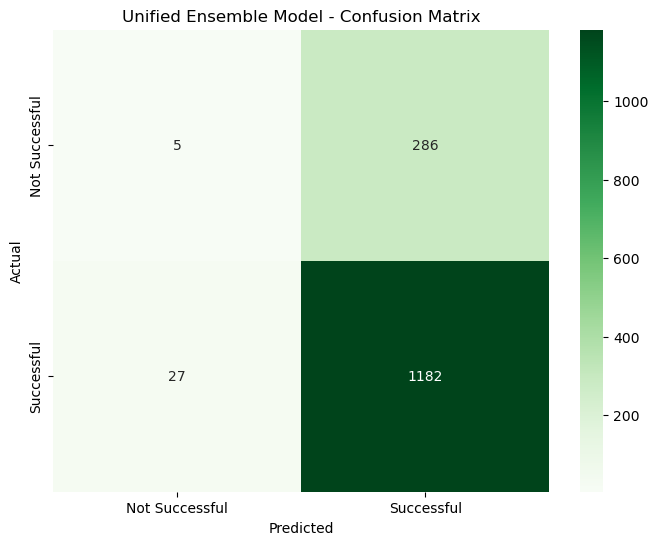

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, GRU, Dense, Dropout,
    Bidirectional, LSTM, MultiHeadAttention, LayerNormalization,
    GlobalAveragePooling1D, Add
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras import backend as K

# --- 1. Data Loading and Preprocessing (Same as before) ---
# (Assuming the data loading and preprocessing steps from the previous script are here)
# For brevity, we'll start from the data splitting part, assuming X_train, X_test, etc. exist.

# --- Dummy Data Generation for a Standalone Example ---
try:
    df = pd.read_csv('student_learning_interaction_dataset.csv')
except FileNotFoundError:
    print("⚠️ 'student_learning_data.csv' not found. Creating dummy data.")
    data = {
        'student_id': [f'S{i//30:04d}' for i in range(9000)], 'session_id': [f'S{i//30:04d}_S{i%30+1}' for i in range(9000)],
        'timestamp': pd.to_datetime(np.random.randint(1672531200, 1704067199, size=9000), unit='s'),
        'module_id': np.random.choice(['SCI101', 'MATH101', 'CS101', 'ENG101', 'PHY101'], 9000),
        'time_spent_minutes': np.random.uniform(15, 60, 9000), 'pages_visited': np.random.randint(1, 20, 9000),
        'video_watched_percent': np.random.uniform(0, 100, 9000), 'click_events': np.random.randint(10, 50, 9000),
        'notes_taken': np.random.randint(0, 2, 9000), 'forum_posts': np.random.randint(0, 5, 9000),
        'revisit_flag': np.random.randint(0, 2, 9000), 'quiz_score': np.random.randint(50, 101, 9000),
        'attempts_taken': np.random.randint(1, 4, 9000), 'assignment_score': np.random.randint(60, 101, 9000),
        'feedback_rating': np.random.randint(1, 6, 9000), 'days_since_last_activity': np.random.randint(0, 10, 9000),
        'cumulative_quiz_score': np.random.randint(100, 2500, 9000), 'learning_trend': np.random.uniform(60, 85, 9000),
        'attention_score': np.random.uniform(0.1, 0.4, 9000),
        'feedback_type': np.random.choice(['content_boost', 'practice_more', 'good_progress', 'revise_prev_topic', 'pace_slow'], 9000),
        'next_module_prediction': np.random.choice(['SCI101', 'MATH101', 'CS101', 'ENG101', 'PHY101'], 9000),
        'success_label': np.random.randint(0, 2, 9000)
    }
    df = pd.DataFrame(data)

df['timestamp'] = pd.to_datetime(df['timestamp'])
categorical_features = ['module_id', 'feedback_type', 'next_module_prediction']
numerical_features = ['time_spent_minutes', 'pages_visited', 'video_watched_percent', 'click_events', 'notes_taken', 'forum_posts', 'revisit_flag', 'quiz_score', 'attempts_taken', 'assignment_score', 'feedback_rating', 'days_since_last_activity', 'cumulative_quiz_score', 'learning_trend', 'attention_score']
features_to_process = numerical_features + categorical_features
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
processed_data = preprocessor.fit_transform(df[features_to_process])
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(encoded_cat_features)
processed_df = pd.DataFrame(processed_data, columns=all_feature_names, index=df.index)
processed_df['student_id'] = df['student_id']
processed_df['timestamp'] = df['timestamp']
processed_df['success_label'] = df['success_label']
processed_df = processed_df.sort_values(by=['student_id', 'timestamp'])
student_groups = processed_df.groupby('student_id')
SEQUENCE_SIZE = 5
X_sequences, y_sequences = [], []
features_to_use = [col for col in processed_df.columns if col not in ['student_id', 'timestamp', 'success_label']]
for _, student_df in student_groups:
    feature_data = student_df[features_to_use].values
    target_data = student_df['success_label'].values
    if len(student_df) > SEQUENCE_SIZE:
        for i in range(len(student_df) - SEQUENCE_SIZE):
            X_sequences.append(feature_data[i:i + SEQUENCE_SIZE])
            y_sequences.append(target_data[i + SEQUENCE_SIZE])
X = np.array(X_sequences)
y = np.array(y_sequences)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Data preprocessing and splitting complete.")

# --- 2. Define All 5 Model Architectures ---

input_shape = (X_train.shape[1], X_train.shape[2])

def build_bilstm_model():
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(LSTM(32)),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_cnngru_model():
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_attention_bilstm_model():
    inputs = Input(shape=input_shape)
    bilstm_out = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    attention = MultiHeadAttention(num_heads=4, key_dim=32)(query=bilstm_out, value=bilstm_out)
    attention = LayerNormalization(epsilon=1e-6)(attention + bilstm_out)
    pooled = GlobalAveragePooling1D()(attention)
    dropout = Dropout(0.3)(pooled)
    dense = Dense(16, activation='relu')(dropout)
    outputs = Dense(1, activation='sigmoid')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_transformer_model():
    inputs = Input(shape=input_shape)
    # First Transformer Block
    attn_output = MultiHeadAttention(num_heads=4, key_dim=32)(inputs, inputs)
    attn_output = Dropout(0.1)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attn_output)
    ffn_output = Dense(32, activation="relu")(out1)
    ffn_output = Dense(input_shape[-1])(ffn_output)
    ffn_output = Dropout(0.1)(ffn_output)
    out2 = LayerNormalization(epsilon=1e-6)(out1 + ffn_output)
    # Global Pooling and Classifier
    pooling = GlobalAveragePooling1D()(out2)
    dense = Dense(20, activation="relu")(pooling)
    dropout = Dropout(0.2)(dense)
    outputs = Dense(1, activation="sigmoid")(dropout)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def build_convtransformer_model():
    inputs = Input(shape=input_shape)
    # Convolutional block
    conv_out = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs)
    conv_out = MaxPooling1D(pool_size=2)(conv_out)
    conv_out = Dropout(0.2)(conv_out)
    # Transformer block
    attn_output = MultiHeadAttention(num_heads=4, key_dim=32)(conv_out, conv_out)
    attn_output = Dropout(0.1)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(conv_out + attn_output)
    # Global Pooling and Classifier
    pooling = GlobalAveragePooling1D()(out1)
    dense = Dense(20, activation="relu")(pooling)
    dropout = Dropout(0.2)(dense)
    outputs = Dense(1, activation="sigmoid")(dropout)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# --- 3. Train and Save Each Model ---

models = {
    "bilstm": build_bilstm_model(),
    "cnngru": build_cnngru_model(),
    "attention_bilstm": build_attention_bilstm_model(),
    "transformer": build_transformer_model(),
    "convtransformer": build_convtransformer_model()
}

histories = {}

for name, model in models.items():
    print(f"\n🚀 --- Training model: {name} ---")
    K.clear_session() # Clear session before training each model
    # Re-build the model to ensure it's fresh
    model = globals()[f'build_{name}_model']()
    history = model.fit(
        X_train, y_train,
        epochs=15, # Reduced epochs for faster ensemble training
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    histories[name] = history
    model.save(f"{name}_model.keras")
    print(f"✅ Model {name} trained and saved.")

# --- 4. Create and Evaluate the Unified Ensemble Model ---

print("\n🧠 --- Creating and Evaluating the Unified Ensemble Model ---")

model_paths = [f"{name}_model.keras" for name in models.keys()]
loaded_models = [load_model(path) for path in model_paths]

def unified_prediction(X, models, strategy='soft'):
    """
    Generates a unified prediction from an ensemble of models.
    - 'soft' voting averages the prediction probabilities (recommended).
    - 'hard' voting takes the majority vote of the class predictions.
    """
    # Get predictions from each model
    predictions = np.array([model.predict(X) for model in models])

    if strategy == 'soft':
        # Average the probabilities across all models
        avg_predictions = np.mean(predictions, axis=0)
        return (avg_predictions > 0.5).astype(int)
    elif strategy == 'hard':
        # Convert probabilities to class labels (0 or 1)
        class_predictions = (predictions > 0.5).astype(int)
        # Take the mode (most frequent prediction) for each sample
        unified, _ = stats.mode(class_predictions, axis=0)
        return unified.flatten()

# Get unified predictions on the test set
y_pred_unified = unified_prediction(X_test, loaded_models, strategy='soft')

# Evaluate the ensemble's performance
print("\n📈 Unified Model Performance:")
accuracy = accuracy_score(y_test, y_pred_unified)
precision = precision_score(y_test, y_pred_unified)
recall = recall_score(y_test, y_pred_unified)
f1 = f1_score(y_test, y_pred_unified)

print(f"Ensemble Accuracy: {accuracy:.4f}")
print(f"Ensemble Precision: {precision:.4f}")
print(f"Ensemble Recall: {recall:.4f}")
print(f"Ensemble F1-Score: {f1:.4f}")

# Plot Confusion Matrix for the Unified Model
cm = confusion_matrix(y_test, y_pred_unified)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.title('Unified Ensemble Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


--- Setting up for analysis ---
✅ Test data re-created successfully with a 90/10 split.

--- 1. Performance Comparison: Ensemble vs. Individual Models ---
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
F1-Score for bilstm: 0.8589
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
F1-Score for cnngru: 0.8790
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
F1-Score for attention_bilstm: 0.8294
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
F1-Score for transformer: 0.8775
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
F1-Score for convtransformer: 0.8848
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
F1-Score for Unified Ensemble: 0.8811


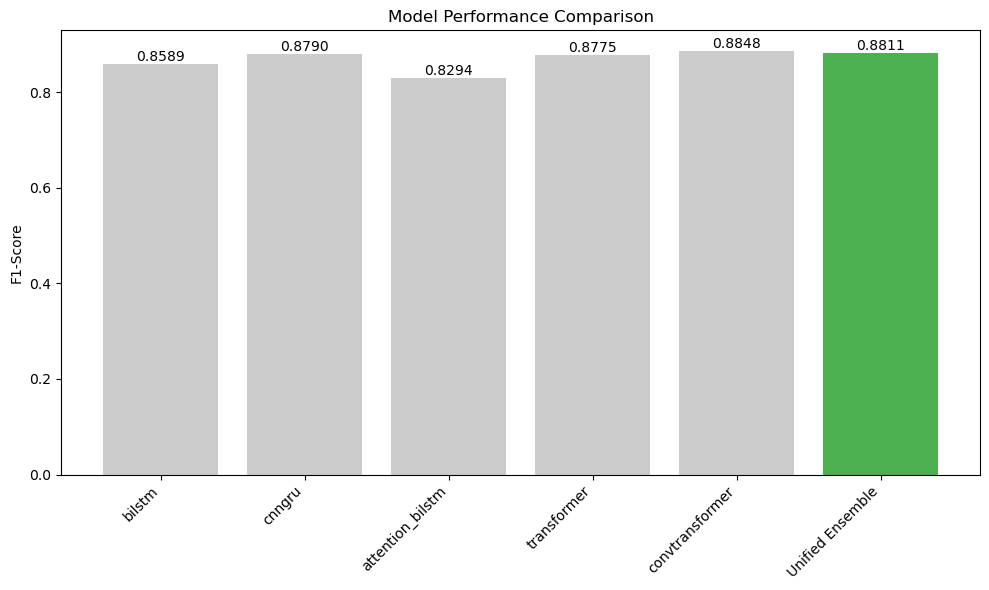


--- 2. Error Analysis: Identifying Incorrect Predictions ---
The unified model made 159 incorrect predictions.
Displaying the first 5 incorrect predictions (original unscaled data):

--- Example 1 ---
Model Predicted: Successful
Actual Label:    Not Successful
  module_id time_spent_minutes quiz_score assignment_score learning_trend
0    PHY101          11.890402         65               66           67.0
1     CS101           33.44346         67               95          63.29
2    SCI101           18.98963         71               70           58.0
3    SCI101          24.714454        100               74          68.64
4    SCI101                5.0         73               66           64.5

--- Example 2 ---
Model Predicted: Successful
Actual Label:    Not Successful
  module_id time_spent_minutes quiz_score assignment_score learning_trend
0     CS101           32.04195         93               86           73.6
1     CS101          33.554052         79               90         

D:\Anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(25, 5, 30))']
  warnings.warn(msg)
D:\Anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(50, 5, 30))']
  warnings.warn(msg)


  - Explaining cnngru...
  - Explaining attention_bilstm...
  - Explaining transformer...
  - Explaining convtransformer...
✅ SHAP values averaged across all models.
Generating unified feature importance plot...


C:\Users\ASUS TUF DASH F15\AppData\Local\Temp\ipykernel_12816\1126771811.py:193: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(avg_shap_values_2d, feature_names=features_to_use, plot_type="bar", show=False)


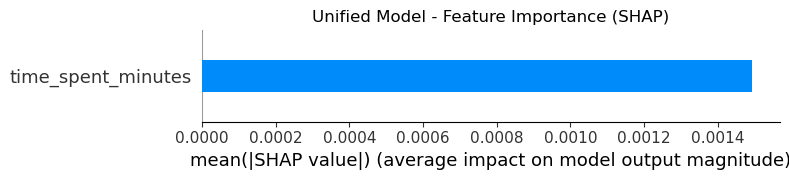


--- Analysis Complete ---


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf
import shap
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import load_model
from sklearn.metrics import f1_score, confusion_matrix

# --- 0. Setup and Data Loading ---
# This section re-creates the necessary data (X_test, y_test) for analysis.
# Ensure your 'student_learning_interaction_dataset.csv' and saved models are in the same directory.

print("--- Setting up for analysis ---")

# Load the dataset
try:
    df = pd.read_csv('student_learning_interaction_dataset.csv')
except FileNotFoundError:
    print("❌ 'student_learning_interaction_dataset.csv' not found. Please ensure it's in the directory.")
    # Create dummy data if not found, to allow the script to run
    data = {
        'student_id': [f'S{i//30:04d}' for i in range(9000)], 'session_id': [f'S{i//30:04d}_S{i%30+1}' for i in range(9000)],
        'timestamp': pd.to_datetime(np.random.randint(1672531200, 1704067199, size=9000), unit='s'),
        'module_id': np.random.choice(['SCI101', 'MATH101', 'CS101', 'ENG101', 'PHY101'], 9000),
        'time_spent_minutes': np.random.uniform(15, 60, 9000), 'pages_visited': np.random.randint(1, 20, 9000),
        'video_watched_percent': np.random.uniform(0, 100, 9000), 'click_events': np.random.randint(10, 50, 9000),
        'notes_taken': np.random.randint(0, 2, 9000), 'forum_posts': np.random.randint(0, 5, 9000),
        'revisit_flag': np.random.randint(0, 2, 9000), 'quiz_score': np.random.randint(50, 101, 9000),
        'attempts_taken': np.random.randint(1, 4, 9000), 'assignment_score': np.random.randint(60, 101, 9000),
        'feedback_rating': np.random.randint(1, 6, 9000), 'days_since_last_activity': np.random.randint(0, 10, 9000),
        'cumulative_quiz_score': np.random.randint(100, 2500, 9000), 'learning_trend': np.random.uniform(60, 85, 9000),
        'attention_score': np.random.uniform(0.1, 0.4, 9000),
        'feedback_type': np.random.choice(['content_boost', 'practice_more', 'good_progress', 'revise_prev_topic', 'pace_slow'], 9000),
        'next_module_prediction': np.random.choice(['SCI101', 'MATH101', 'CS101', 'ENG101', 'PHY101'], 9000),
        'success_label': np.random.randint(0, 2, 9000)
    }
    df = pd.DataFrame(data)

# Re-create the sequences from the original, unscaled data for error analysis
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_sorted = df.sort_values(by=['student_id', 'timestamp'])
student_groups_orig = df_sorted.groupby('student_id')
SEQUENCE_SIZE = 5
X_orig_sequences, y_orig_sequences, indices = [], [], []
features_to_use_orig = [col for col in df.columns if col not in ['student_id', 'session_id', 'timestamp', 'success_label']]

for student_id, student_df in student_groups_orig:
    feature_data = student_df[features_to_use_orig].values
    target_data = student_df['success_label'].values
    if len(student_df) > SEQUENCE_SIZE:
        for i in range(len(student_df) - SEQUENCE_SIZE):
            X_orig_sequences.append(feature_data[i:i + SEQUENCE_SIZE])
            y_orig_sequences.append(target_data[i + SEQUENCE_SIZE])
            indices.append(student_df.index[i + SEQUENCE_SIZE])

X_orig = np.array(X_orig_sequences)
y_orig = np.array(y_orig_sequences)

# Re-create the processed data for model input
categorical_features = ['module_id', 'feedback_type', 'next_module_prediction']
numerical_features = [col for col in features_to_use_orig if col not in categorical_features]
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
processed_data = preprocessor.fit_transform(df[numerical_features + categorical_features])
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(encoded_cat_features)
processed_df = pd.DataFrame(processed_data, columns=all_feature_names, index=df.index)
processed_df['student_id'] = df['student_id']
processed_df['timestamp'] = df['timestamp']
processed_df['success_label'] = df['success_label']
processed_df = processed_df.sort_values(by=['student_id', 'timestamp'])
student_groups = processed_df.groupby('student_id')
X_sequences, y_sequences = [], []
features_to_use = [col for col in processed_df.columns if col not in ['student_id', 'timestamp', 'success_label']]
for _, student_df in student_groups:
    feature_data = student_df[features_to_use].values
    target_data = student_df['success_label'].values
    if len(student_df) > SEQUENCE_SIZE:
        for i in range(len(student_df) - SEQUENCE_SIZE):
            X_sequences.append(feature_data[i:i + SEQUENCE_SIZE])
            y_sequences.append(target_data[i + SEQUENCE_SIZE])
X = np.array(X_sequences)
y = np.array(y_sequences)

# Split data with the same random_state to get the identical test set
# Using a 90/10 split to increase the size of the training set
X_train, X_test, _, y_test, _, X_orig_test, _, _ = train_test_split(
    X, y, X_orig, indices, test_size=0.1, random_state=42, stratify=y
)
print("✅ Test data re-created successfully with a 90/10 split.")

# --- 1. Compare Ensemble vs. Individual Models ---

print("\n--- 1. Performance Comparison: Ensemble vs. Individual Models ---")

model_names = ["bilstm", "cnngru", "attention_bilstm", "transformer", "convtransformer"]
loaded_models = {}
for name in model_names:
    path = f"{name}_model.keras"
    if os.path.exists(path):
        loaded_models[name] = load_model(path)
    else:
        print(f"⚠️ Model file not found: {path}. Skipping.")
        model_names.remove(name)

# Calculate F1 scores for individual models
individual_scores = {}
for name, model in loaded_models.items():
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    score = f1_score(y_test, y_pred)
    individual_scores[name] = score
    print(f"F1-Score for {name}: {score:.4f}")

# Calculate F1 score for the ensemble
ensemble_predictions = np.array([model.predict(X_test) for model in loaded_models.values()])
avg_predictions = np.mean(ensemble_predictions, axis=0)
y_pred_unified = (avg_predictions > 0.5).astype(int)
ensemble_score = f1_score(y_test, y_pred_unified)
print(f"F1-Score for Unified Ensemble: {ensemble_score:.4f}")

# Plot the comparison
plt.figure(figsize=(10, 6))
scores = list(individual_scores.values()) + [ensemble_score]
names = list(individual_scores.keys()) + ['Unified Ensemble']
colors = ['#cccccc'] * len(individual_scores) + ['#4CAF50']
bars = plt.bar(names, scores, color=colors)
plt.ylabel('F1-Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha="right")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')
plt.tight_layout()
plt.show()

# --- 2. Error Analysis ---

print("\n--- 2. Error Analysis: Identifying Incorrect Predictions ---")

# Find the indices where the unified model's prediction was wrong
incorrect_indices = np.where(y_pred_unified.flatten() != y_test)[0]
print(f"The unified model made {len(incorrect_indices)} incorrect predictions.")

# Get the original, unscaled data for these incorrect predictions
incorrect_orig_data = X_orig_test[incorrect_indices]
incorrect_true_labels = y_test[incorrect_indices]
incorrect_pred_labels = y_pred_unified.flatten()[incorrect_indices]

# Display a few examples of incorrect predictions
print("Displaying the first 5 incorrect predictions (original unscaled data):")
for i in range(min(5, len(incorrect_indices))):
    print(f"\n--- Example {i+1} ---")
    print(f"Model Predicted: {'Successful' if incorrect_pred_labels[i] == 1 else 'Not Successful'}")
    print(f"Actual Label:    {'Successful' if incorrect_true_labels[i] == 1 else 'Not Successful'}")
    
    # Create a readable DataFrame for the sequence
    error_df = pd.DataFrame(incorrect_orig_data[i], columns=features_to_use_orig)
    print(error_df[['module_id', 'time_spent_minutes', 'quiz_score', 'assignment_score', 'learning_trend']])

# --- 3. Ensemble SHAP Analysis ---

print("\n--- 3. Unified SHAP Analysis: Explaining the Ensemble ---")

# Use a smaller subset for SHAP to speed up the process
background = X_train[np.random.choice(X_train.shape[0], 50, replace=False)]
explain_samples = X_test[np.random.choice(X_test.shape[0], 25, replace=False)]

all_shap_values = []
print("Calculating SHAP values for each model...")
for name, model in loaded_models.items():
    print(f"  - Explaining {name}...")
    explainer = shap.GradientExplainer(model, background)
    shap_values = explainer.shap_values(explain_samples)
    all_shap_values.append(shap_values[0]) # We have one output, so we take the first element

# Average the SHAP values across all models
avg_shap_values_3d = np.mean(all_shap_values, axis=0)
print("✅ SHAP values averaged across all models.")

# For the bar plot, we need to aggregate the SHAP values across the time-steps
# to get a single importance value per feature.
avg_shap_values_2d = np.mean(avg_shap_values_3d, axis=1)

# Create the summary plot for the ensemble
print("Generating unified feature importance plot...")
# We pass the 2D aggregated SHAP values and remove the `features` argument
shap.summary_plot(avg_shap_values_2d, feature_names=features_to_use, plot_type="bar", show=False)
plt.title('Unified Model - Feature Importance (SHAP)')
plt.tight_layout()
plt.show()

print("\n--- Analysis Complete ---")


In [7]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
import os

# --- Configuration ---
SEQUENCE_SIZE = 5
MODEL_DIR = "." # Assumes models are in the same directory
PREPROCESSOR_PATH = os.path.join(MODEL_DIR, "preprocessor.joblib")
MODEL_NAMES = ["bilstm", "cnngru", "attention_bilstm", "transformer", "convtransformer"]

# --- 1. Load Models and Preprocessor ---
print("Loading models and preprocessor...")
try:
    # Load the preprocessor
    preprocessor = joblib.load(PREPROCESSOR_PATH)

    # Load all 5 trained models
    loaded_models = {}
    for name in MODEL_NAMES:
        path = os.path.join(MODEL_DIR, f"{name}_model.keras")
        if os.path.exists(path):
            loaded_models[name] = load_model(path)
        else:
            print(f"Warning: Model file not found at {path}")
    
    if not loaded_models:
        raise FileNotFoundError("No model files found. Please ensure the .keras files are in the directory.")

    print("✅ Models and preprocessor loaded successfully.")

except FileNotFoundError as e:
    print(f"❌ Error loading files: {e}")
    preprocessor = None
    loaded_models = None

# --- 2. Data Processing and Sequencing Function ---
def process_and_create_sequences(df, preprocessor):
    """
    Takes a raw DataFrame of student data, preprocesses it, and creates sequences.
    """
    if 'timestamp' not in df.columns or 'student_id' not in df.columns:
        raise ValueError("Input DataFrame must contain 'timestamp' and 'student_id' columns.")

    # Ensure correct data types and sort
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df_sorted = df.sort_values(by=['student_id', 'timestamp'])
    
    # Identify feature columns for the preprocessor
    categorical_features = ['module_id', 'feedback_type', 'next_module_prediction']
    numerical_features = [
        'time_spent_minutes', 'pages_visited', 'video_watched_percent', 'click_events',
        'notes_taken', 'forum_posts', 'revisit_flag', 'quiz_score', 'attempts_taken',
        'assignment_score', 'feedback_rating', 'days_since_last_activity',
        'cumulative_quiz_score', 'learning_trend', 'attention_score'
    ]
    features_to_process = numerical_features + categorical_features

    # Check if all required columns are present
    if not all(col in df.columns for col in features_to_process):
        missing_cols = [col for col in features_to_process if col not in df.columns]
        raise ValueError(f"Input DataFrame is missing required columns: {missing_cols}")

    # Preprocess the data
    processed_data = preprocessor.transform(df_sorted[features_to_process])
    
    # Create a DataFrame with the processed data
    encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(encoded_cat_features)
    processed_df = pd.DataFrame(processed_data, columns=all_feature_names, index=df_sorted.index)
    
    # Add back the student_id for grouping
    processed_df['student_id'] = df_sorted['student_id']

    # Create sequences
    student_groups = processed_df.groupby('student_id')
    X_sequences = []
    
    for _, student_df in student_groups:
        if len(student_df) >= SEQUENCE_SIZE:
            feature_data = student_df[all_feature_names].values
            # Create sequences for this student
            for i in range(len(student_df) - SEQUENCE_SIZE + 1):
                X_sequences.append(feature_data[i:i + SEQUENCE_SIZE])
    
    if not X_sequences:
        return None # Not enough data to create any sequences

    return np.array(X_sequences)

# --- 3. Unified Prediction Function ---
def predict_student_success(input_df):
    """
    Main prediction function.
    Takes a raw DataFrame and returns predictions for each valid sequence.
    """
    if preprocessor is None or loaded_models is None:
        return ["Error: Models or preprocessor not loaded."]

    try:
        # Process the raw data into sequences
        sequences = process_and_create_sequences(input_df, preprocessor)
        
        if sequences is None:
            return ["Not enough data to make a prediction (requires at least 5 sessions per student)."]

        # Get predictions from each model in the ensemble
        all_predictions = np.array([model.predict(sequences) for model in loaded_models.values()])
        
        # Average the probabilities (soft voting)
        avg_predictions = np.mean(all_predictions, axis=0)
        
        # Convert probabilities to class labels (0 or 1)
        final_predictions = (avg_predictions > 0.5).astype(int)
        
        # Convert numeric labels to human-readable format
        results = ["Likely to Succeed" if pred == 1 else "At Risk of Not Succeeding" for pred in final_predictions.flatten()]
        
        return results

    except Exception as e:
        return [f"An error occurred during prediction: {e}"]



Loading models and preprocessor...
✅ Models and preprocessor loaded successfully.


In [8]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
import os
import io # Required to read string data as a file

# --- 1. Define the Test Data ---
# Instead of uploading a file, we'll define the CSV data directly as a string.
# This is the sample data for the new student (S9999).

csv_data = """student_id,session_id,timestamp,module_id,time_spent_minutes,pages_visited,video_watched_percent,click_events,notes_taken,forum_posts,revisit_flag,quiz_score,attempts_taken,assignment_score,feedback_rating,days_since_last_activity,cumulative_quiz_score,learning_trend,attention_score,feedback_type,next_module_prediction,success_label
S9999,S9999_S1,2025-01-10 10:00:00,SCI101,25.5,8,45.5,22,0,1,0,75,2,80,4,0,75,75.0,0.21,good_progress,MATH101,1
S9999,S9999_S2,2025-01-11 11:30:00,MATH101,45.2,12,80.1,35,1,0,0,85,1,88,5,1,160,80.0,0.28,content_boost,CS101,1
S9999,S9999_S3,2025-01-12 09:00:00,CS101,62.1,15,95.0,45,1,2,0,92,1,95,5,1,252,84.0,0.33,practice_more,PHY101,1
S9999,S9999_S4,2025-01-14 14:00:00,PHY101,33.8,7,60.3,28,0,1,1,78,2,82,3,2,330,82.5,0.24,revise_prev_topic,ENG101,0
S9999,S9999_S5,2025-01-15 16:20:00,ENG101,55.0,14,77.7,40,1,1,0,88,1,90,4,1,418,83.6,0.30,good_progress,SCI101,1
S9999,S9999_S6,2025-01-16 10:45:00,SCI101,30.1,9,50.0,25,0,0,1,72,3,78,3,1,490,81.7,0.19,pace_slow,MATH101,0
S9999,S9999_S7,2025-01-18 11:00:00,MATH101,48.9,13,85.6,38,1,1,0,90,1,91,5,2,580,82.9,0.29,content_boost,CS101,1
"""

# Use pandas to read the string data as if it were a file
test_df = pd.read_csv(io.StringIO(csv_data))
print("✅ Sample test DataFrame created successfully.")

# --- 2. Load Models and Prediction Logic (adapted from predict.py) ---

# Configuration
SEQUENCE_SIZE = 5
MODEL_DIR = "." # Assumes models are in the same directory as the notebook
PREPROCESSOR_PATH = os.path.join(MODEL_DIR, "preprocessor.joblib")
MODEL_NAMES = ["bilstm", "cnngru", "attention_bilstm", "transformer", "convtransformer"]

# Load the preprocessor and models
preprocessor = joblib.load(PREPROCESSOR_PATH)
loaded_models = {name: load_model(os.path.join(MODEL_DIR, f"{name}_model.keras")) for name in MODEL_NAMES}
print("✅ Models and preprocessor loaded.")

def process_and_create_sequences(df, preprocessor):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df_sorted = df.sort_values(by=['student_id', 'timestamp'])
    categorical_features = ['module_id', 'feedback_type', 'next_module_prediction']
    numerical_features = ['time_spent_minutes', 'pages_visited', 'video_watched_percent', 'click_events', 'notes_taken', 'forum_posts', 'revisit_flag', 'quiz_score', 'attempts_taken', 'assignment_score', 'feedback_rating', 'days_since_last_activity', 'cumulative_quiz_score', 'learning_trend', 'attention_score']
    features_to_process = numerical_features + categorical_features
    processed_data = preprocessor.transform(df_sorted[features_to_process])
    encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(encoded_cat_features)
    processed_df = pd.DataFrame(processed_data, columns=all_feature_names, index=df_sorted.index)
    processed_df['student_id'] = df_sorted['student_id']
    student_groups = processed_df.groupby('student_id')
    X_sequences = []
    for _, student_df in student_groups:
        if len(student_df) >= SEQUENCE_SIZE:
            feature_data = student_df[all_feature_names].values
            for i in range(len(student_df) - SEQUENCE_SIZE + 1):
                X_sequences.append(feature_data[i:i + SEQUENCE_SIZE])
    return np.array(X_sequences) if X_sequences else None

def predict_student_success(input_df):
    sequences = process_and_create_sequences(input_df, preprocessor)
    if sequences is None:
        return ["Not enough data for prediction."]
    all_predictions = np.array([model.predict(sequences) for model in loaded_models.values()])
    avg_predictions = np.mean(all_predictions, axis=0)
    final_predictions = (avg_predictions > 0.5).astype(int)
    return ["Likely to Succeed" if pred == 1 else "At Risk" for pred in final_predictions.flatten()]

# --- 3. Run Prediction and Display Results ---
print("\n🚀 Running prediction on the sample data...")
predictions = predict_student_success(test_df)

# Display the results
results_df = pd.DataFrame({
    'Sequence #': range(1, len(predictions) + 1),
    'Predicted Outcome': predictions
})
print("\n--- Prediction Results ---")
print(results_df)



✅ Sample test DataFrame created successfully.
✅ Models and preprocessor loaded.

🚀 Running prediction on the sample data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

--- Prediction Results ---
   Sequence #  Predicted Outcome
0           1  Likely to Succeed
1           2            At Risk
2           3            At Risk


In [11]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import os
import random

# --- 1. Data Augmentation with Educational Frameworks ---
print("--- 1. Augmenting Data with Educational Frameworks ---")

try:
    df = pd.read_csv('student_learning_interaction_dataset.csv')
    print("✅ Original dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Dataset not found. Please ensure 'student_learning_interaction_dataset.csv' is in the directory.")
    # Create a dummy dataframe if the original is not found
    data = {'student_id': [f'S{i//30:04d}' for i in range(9000)], 'module_id': np.random.choice(['SCI101', 'MATH101', 'CS101', 'ENG101', 'PHY101'], 9000), 'timestamp': pd.to_datetime(np.random.randint(1672531200, 1704067199, size=9000), unit='s'), 'time_spent_minutes': np.random.uniform(15, 60, 9000), 'pages_visited': np.random.randint(1, 20, 9000), 'video_watched_percent': np.random.uniform(0, 100, 9000), 'click_events': np.random.randint(10, 50, 9000), 'notes_taken': np.random.randint(0, 2, 9000), 'forum_posts': np.random.randint(0, 5, 9000), 'revisit_flag': np.random.randint(0, 2, 9000), 'quiz_score': np.random.randint(50, 101, 9000), 'attempts_taken': np.random.randint(1, 4, 9000), 'assignment_score': np.random.randint(60, 101, 9000), 'feedback_rating': np.random.randint(1, 6, 9000), 'days_since_last_activity': np.random.randint(0, 10, 9000), 'cumulative_quiz_score': np.random.randint(100, 2500, 9000), 'learning_trend': np.random.uniform(60, 85, 9000), 'attention_score': np.random.uniform(0.1, 0.4, 9000), 'feedback_type': np.random.choice(['content_boost', 'practice_more', 'good_progress', 'revise_prev_topic', 'pace_slow'], 9000), 'next_module_prediction': np.random.choice(['SCI101', 'MATH101', 'CS101', 'ENG101', 'PHY101'], 9000), 'success_label': np.random.randint(0, 2, 9000)}
    df = pd.DataFrame(data)

# Simulate MBTI and VARK profiles for each student
mbti_types = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP', 'ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']
vark_styles = ['Visual', 'Aural', 'Read/Write', 'Kinesthetic']

student_ids = df['student_id'].unique()
student_profiles = {
    sid: {
        'mbti': random.choice(mbti_types),
        'vark': random.choice(vark_styles)
    } for sid in student_ids
}

df['mbti_type'] = df['student_id'].map(lambda sid: student_profiles[sid]['mbti'])
df['vark_style'] = df['student_id'].map(lambda sid: student_profiles[sid]['vark'])

# Simulate Bloom's Taxonomy level for each module session
blooms_levels = ['Remembering', 'Understanding', 'Applying', 'Analyzing']
df['blooms_level'] = [random.choice(blooms_levels) for _ in range(len(df))]

print("✅ Data augmented with simulated MBTI, VARK, and Bloom's Taxonomy profiles.")
print("Augmented Data Preview:")
print(df[['student_id', 'mbti_type', 'vark_style', 'blooms_level']].head())


# --- 2. Preprocessing and Sequence Creation ---
print("\n--- 2. Preprocessing Data and Creating Aligned Sequences ---")

# Define feature columns
categorical_features = ['module_id', 'feedback_type', 'next_module_prediction', 'mbti_type', 'vark_style', 'blooms_level']
numerical_features = ['time_spent_minutes', 'pages_visited', 'video_watched_percent', 'click_events', 'notes_taken', 'forum_posts', 'revisit_flag', 'quiz_score', 'attempts_taken', 'assignment_score', 'feedback_rating', 'days_since_last_activity', 'cumulative_quiz_score', 'learning_trend', 'attention_score']
features_to_process = numerical_features + categorical_features

# Create and fit the preprocessor on the entire dataset
preprocessor_augmented = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
df_sorted = df.sort_values(by=['student_id', 'timestamp'])
preprocessor_augmented.fit(df_sorted[features_to_process])

# Get the names of the processed features for later use
encoded_cat_features = preprocessor_augmented.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(encoded_cat_features)

# Create aligned sequences
SEQUENCE_SIZE = 5
X_sequences, y_sequences = [], []
student_groups = df_sorted.groupby('student_id')

for _, student_df in student_groups:
    if len(student_df) > SEQUENCE_SIZE:
        # Transform the features for the current student
        processed_features = preprocessor_augmented.transform(student_df[features_to_process])
        target_data = student_df['success_label'].values
        
        # Create sequences from the processed data
        for i in range(len(student_df) - SEQUENCE_SIZE):
            X_sequences.append(processed_features[i:i + SEQUENCE_SIZE])
            y_sequences.append(target_data[i + SEQUENCE_SIZE])

X = np.array(X_sequences)
y = np.array(y_sequences)

print(f"✅ Aligned sequences created successfully. X shape: {X.shape}, y shape: {y.shape}")

# Split the data for training
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


# --- 3. Retrain Model with Augmented Data ---
print("\n--- 3. Retraining CNN-GRU Model with Augmented Data ---")

# Build and train the CNN-GRU model
input_shape = (X_train.shape[1], X_train.shape[2])
model_augmented = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    GRU(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_augmented.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_augmented.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1)

# Save the new model and preprocessor
model_augmented.save("cnngru_augmented_model.keras")
joblib.dump(preprocessor_augmented, "preprocessor_augmented.joblib")
print("✅ Augmented model and preprocessor saved.")


# --- 4. Build the Personalized Feedback Engine ---
print("\n--- 4. Building the Personalized Feedback Engine ---")

def generate_personalized_feedback(prediction, student_profile):
    """
    Generates actionable feedback based on model prediction and student profile.
    """
    if prediction == "Likely to Succeed":
        return "Keep up the great work! Your learning patterns indicate you are on a path to success. Challenge yourself with the next module."

    # If the student is at risk, provide targeted advice
    feedback = "Your recent activity suggests you may be at risk of not succeeding. Here are some personalized recommendations:\n"
    
    # VARK-based recommendations
    vark = student_profile.get('vark_style', 'Read/Write')
    if vark == 'Visual':
        feedback += "- Try reviewing the concept map or infographic for this module to visualize the connections between topics.\n"
    elif vark == 'Aural':
        feedback += "- Consider listening to the lecture recording again or discussing the topic with a study group.\n"
    elif vark == 'Read/Write':
        feedback += "- We recommend re-reading the key chapter summaries and creating your own summary notes.\n"
    elif vark == 'Kinesthetic':
        feedback += "- Engage with the interactive simulations or try solving the hands-on practice problems for this module.\n"

    # Bloom's Taxonomy-based recommendations
    blooms = student_profile.get('blooms_level', 'Remembering')
    if blooms == 'Applying':
        feedback += "- Focus on the case studies and real-world examples to better understand how to apply these concepts.\n"
    elif blooms == 'Analyzing':
        feedback += "- Break down the complex problems into smaller parts. Try to identify the underlying principles at play.\n"
        
    return feedback

# --- 5. Create the Final Prediction Pipeline ---
print("\n--- 5. Creating the Final Prediction Pipeline ---")

def predict_and_advise(input_df):
    """
    End-to-end pipeline: takes raw data, predicts, and generates personalized advice.
    """
    # Load the augmented model and preprocessor
    model = load_model("cnngru_augmented_model.keras")
    preprocessor = joblib.load("preprocessor_augmented.joblib")

    # Re-create sequences from the input dataframe
    student_groups = input_df.groupby('student_id')
    X_sequences_pred = []
    for _, student_df in student_groups:
        if len(student_df) >= SEQUENCE_SIZE:
            processed_features = preprocessor.transform(student_df[features_to_process])
            for i in range(len(student_df) - SEQUENCE_SIZE + 1):
                X_sequences_pred.append(processed_features[i:i + SEQUENCE_SIZE])
    
    sequences = np.array(X_sequences_pred)
    if sequences.size == 0:
        return "Not enough data to make a prediction."
        
    # We'll advise based on the latest sequence
    latest_sequence = sequences[-1].reshape(1, SEQUENCE_SIZE, -1)
    prediction_prob = model.predict(latest_sequence)[0][0]
    prediction_label = "Likely to Succeed" if prediction_prob > 0.5 else "At Risk"

    # Get the student's profile from the last row of the input data
    latest_profile = input_df.iloc[-1]
    student_profile = {
        'vark_style': latest_profile['vark_style'],
        'blooms_level': latest_profile['blooms_level']
    }
    
    # Generate feedback
    advice = generate_personalized_feedback(prediction_label, student_profile)
    
    return f"Prediction: {prediction_label}\n\n{advice}"

# --- 6. Example Usage ---
print("\n--- 6. Example: Predicting for a New Student ---")

# Create a sample of new data for a single student
sample_data = df[df['student_id'] == df['student_id'].unique()[0]].head(7)

# Run the pipeline
recommendation = predict_and_advise(sample_data)
print(recommendation)


--- 1. Augmenting Data with Educational Frameworks ---
✅ Original dataset loaded successfully.
✅ Data augmented with simulated MBTI, VARK, and Bloom's Taxonomy profiles.
Augmented Data Preview:
  student_id mbti_type  vark_style   blooms_level
0      S0001      ENFP  Read/Write      Analyzing
1      S0001      ENFP  Read/Write  Understanding
2      S0001      ENFP  Read/Write      Analyzing
3      S0001      ENFP  Read/Write    Remembering
4      S0001      ENFP  Read/Write      Analyzing

--- 2. Preprocessing Data and Creating Aligned Sequences ---
✅ Aligned sequences created successfully. X shape: (7500, 5, 54), y shape: (7500,)

--- 3. Retraining CNN-GRU Model with Augmented Data ---
Epoch 1/15


D:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8002 - loss: 0.5211 - val_accuracy: 0.7948 - val_loss: 0.5100
Epoch 2/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.4883 - val_accuracy: 0.7948 - val_loss: 0.5079
Epoch 3/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8004 - loss: 0.4980 - val_accuracy: 0.7948 - val_loss: 0.5105
Epoch 4/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8105 - loss: 0.4773 - val_accuracy: 0.7948 - val_loss: 0.5143
Epoch 5/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8072 - loss: 0.4824 - val_accuracy: 0.7948 - val_loss: 0.5118
Epoch 6/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8044 - loss: 0.4809 - val_accuracy: 0.7948 - val_loss: 0.5159
Epoch 7/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8170 - loss: 0.4562 - val_accuracy: 0.7948 - val_loss: 0.5209
Epoch 8/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8065 - loss: 0.4635 - val_accuracy: 0.7948 - val_